# Introduction

Welcome to the first lab. Take a moment to familiarize yourself with this interactive notebook. Each notebook is composed of cells. Each cell can be [markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) (easy-to-format text) or code (Python 3). Feel free to double-click on the description cells to see how they were made.

When a cell is highlighted, it has two modes: command and input. Press `esc` to go to *command mode*, press `enter` to go into *edit/input mode*. There are a few shortcuts that only work in edit mode that can make your life easier. This will probably satiate your curiosity: [[link]](https://towardsdatascience.com/optimizing-jupyter-notebook-tips-tricks-and-nbextensions-26d75d502663).

A few shortcuts that will make your life easier: you can always press `shift+enter` to evaluate the current cell; in *command mode*, press `a` to create a new cell above the current, `b` to create one below, `m` to convert to markdown, `y` to convert to code. Cells can be also merged and split (did you check the shortcuts?).

And if you look for a command for which you don't know the shortcut yet, press `p` for the command palette and try typing what you are looking for in the search field.

### How to pass the lab?

Below you find the exercise questions. Each question awarding points is numbered and states the number of points like this: **[0pts]**. To answer a question, fill the cell below with your answer (markdown for text, code for implementation). Incorrect or incomplete answers are in principle worth 0 points: to assign partial reward is only up to teacher discretion. Overcomplete answers do not award extra points (though they are appreciated and will be kept under consideration). Save your work frequently! (`ctrl+s`)

**You need at least 16 points (out of 24 available) to pass** (66%).

# 1. Fundamentals

Let's start simple. 
#### 1.1 **[1pt]** Write a sentence that correctly employs the words *problem*, *solution*, *model* and *parameters set*.

Solutions to many problems which are alike (e.g. problem: recognizing numbers, alike: recognize number 1, recognize number 2, recognize number 3, etc.) can be provided by finding a model (i.e. the correct parametric equation) which yields solutions to the problems. We can modify the parameter set of such a model to get better solutions.

#### 1.2 **[1pt]** Write the equation of a linear model. You should use $\LaTeX$ formatting, just wrap the equation in between dollar signs (e.g. `$\LaTeX$`).

$y = mx + q$

#### 1.3 **[1pt]** When is a system of equations *overdetermined*?

When there are more data points than unknown parameters.


#### 1.4 **[1pt]** Describe with your own words (i.e. English) what is a *Training Dataset*.
Mind, there is not an explicit definition in the slides, you should understand the math (your lecture notes may help).

A Training Dataset is a set of data to train a model, i.e. to set the parameters of the model right/more correct. 

In a mathematical way: The Training Dataset is a subset of the cartesian Product $Input Space \times Decision Space$.

#### 1.5 **[1pt]** List the other two (main) learning paradigms beside *supervised learning*.

Unsupervised and reinforcement learning. 

#### 1.6 **[1pt]** Which word describes when the model I use is too simplistic to capture the inherent complexity of the data? 
Careful not to pick the wrong term.

Underfit

# 2. Error, loss and risk

Understanding the concept of loss and risk is fundamental to comprehending the general idea of an "error". The whole ML is founded on the basis of recognizing error and minimizing it. These questions go into a separate section to highlight how important it is that you understand what is going on here.

#### 2.1 **[3pt]** About the *Loss Function*: why $L(\hat y, y) = 0 \;\;\text{if}\;\; \hat y = y, \;\;\forall
    y \in Y$?

When the correct value ($y$) and the predicted value ($ \hat y$) are the same, then there is no loss or error, therefore $L(\hat y, y) = 0$ 

If you want to implement the *Empirical Risk* in Python, you need to understand its mathematical form. Let's say that the *Loss* is a simple difference between prediction and target:
#### 2.2 **[3pt]** What does $\hat{R}(h) = \sum_{i=1}^n L(h(x_i), y_i),\;\forall (x_i, y_i) \in D$ mean?
In English, though you will get to code it in one of the next questions.

This is the sum of all Losses of the model $h$ for all values (tuples) of the training data set. The $x_i$ are elements of the input space and $y_i$ are elements of the decision space.

# 3. Simplest learning

Enough concepts, let's have some fun. I hope you are familiar with Python -- if not yet, you should become so by the end of the course. If your confidence is low you should start a discussion on Moodle, so that you can all help each other (and help us help you).

Do you know about `lambda` functions in Python? You can write a method that returns a function. The function can be used as if it was a method defined with `def`. Only be careful about (i) `lambda`s always (implicitly) return, and (ii) you cannot write multiline lambdas. Still, using them is easier than it sounds:

In [ ]:
def add_n(n): return lambda x: n+x
add_3 = add_n(3)
add_3(5)

Ok how about we create and plot some artificial data? Study the code below, if there is any feature you are not yet familiar with you should make sure to learn it (Moodle).

In [ ]:
# These lines are required for our plotting function below
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# While this is the library for numerical manipulations
import numpy as np

# This is just some styiling for the plot
sns.set(rc={'figure.figsize':(8,6)}, style="whitegrid")

# Let's create the data from a function you should be acquainted with
# (do you know lambdas yet? They are basically short, unnamed methods)
trg_fn = lambda x: 2*x - 1 
# Of course we want the data to be a bit noisy
some_noise = lambda: np.random.normal(0,2)
# Let's generate it using a list comprehension, just to make sure you know this too
data = [[x, trg_fn(x) + some_noise()] for x in np.linspace(-10, 10, 50)]
# You will find commonly data treated by axis/column rather than coordinate pairs
transpose = lambda lst: list(map(list, zip(*lst)))
data_x, data_y = transpose(data)

# Ok here's a canned plotting function you are free to use
def plot_data_and_model(model=None, text=None):
    ret = sns.scatterplot(data_x, data_y)
    if model is not None:
        sns.lineplot(data_x, [model(x) for x in data_x], color='darkred')
    if text is not None:
        plt.title(text)
    return ret

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Here is what the data you just generated looks like:

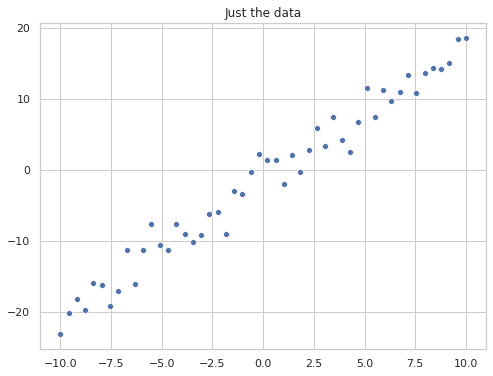

In [ ]:
plot_data_and_model(text="Just the data")

And here is what it looks like if you cheat and plot the underlying function (ideally your final, learned model should look similar)

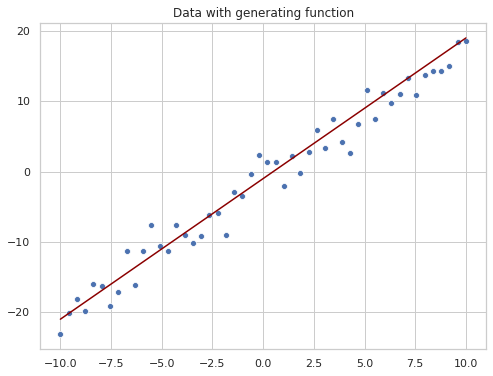

In [ ]:
plot_data_and_model(trg_fn, text="Data with generating function")

#### 6.1 **[2pt]** Write your linear model as a method that takes `m` and `q` as input, and return a linear function of the form `mx + q`.

In [ ]:
f = lambda m,q: lambda x: m*x + q

print(f(2,3)(4))

11


#### 6.2 **[2pt]** Write your loss as a method that takes an `x` and a target and returns the absolute value of their difference
(think: what happens if we forget the absolute value?)

In [ ]:
l = lambda x,y: abs(x-y)
print(l(3,5))

#with no abs()
_l = lambda x,y: x-y
print(_l(3,5))

2
-2


If we don't use the abs() function, we get negative values if $x < y$. That shouldn't happen, since $L: Y \times Y \rightarrow \mathbb{R}^{0}_{+}$.

#### 6.3 **[2pt]** Write your risk as a method that takes a model as input, and returns the total loss over our data

In [ ]:
r = lambda h: sum([ l(_y,y) for (_y,y) in zip(map(h, data_x), data_y) ])
  
r(f(2,3))

205.15812779768098

Here is an example of a loop that generates random numbers and maintains a *minimum*.  
(think: will you need to minimize or maximize the risk of your model?)

[-2.775346881288085,
 -2.820401538031614,
 -2.828987521702916,
 -2.9450888700692532,
 -2.9987238603576047]

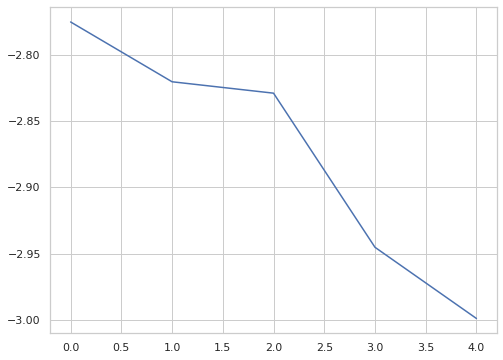

In [ ]:
min_guess = np.Infinity # higher than highest possible

best_guesses = []
for _ in range(100):
    guess = np.random.uniform(-3,3)
    if guess < min_guess:
        min_guess = guess
        best_guesses.append(min_guess)

sns.lineplot(range(len(best_guesses)), best_guesses)
best_guesses

TIP: it can be useful to visualize how the loss decreases over time, especially for debugging purposes. You can do the same next for your errors/losses.

#### 6.4 **[6pt]** Randomly guess a model's parameters 1000 times. Then plot it using the call below.
```python
plot_data_and_model(lin_model(m, q), text=f"m={round(m,2)}    q={round(q,2)}")        
```
Make sure you understand how string interpolation works when using the format `f"hello w{2+1-3}rld"`.  
You will need to modify the loop above in order to maintain both a best guess for your model and its corresponding best risk/error.

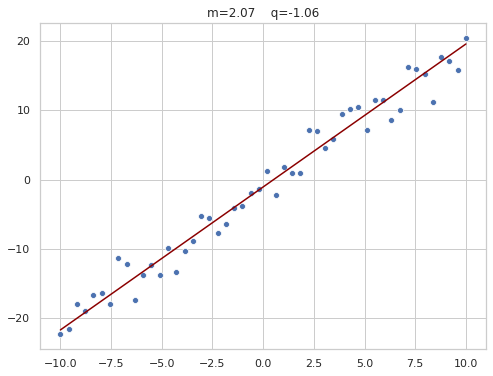

In [ ]:
#returns a tuple (m,q) with the best guesses, where the risk is minimized
#n is the number of guesses we want it to try
def best_guess(n):
  min_guess = np.Infinity # higher than highest possible
  best_guesses = []
  for _ in range(n):
      guess_m = np.random.uniform(-3,3)
      guess_q = np.random.uniform(-3,3)
      risk = r(f(guess_m, guess_q))
      if risk < min_guess:
          min_guess = risk
          best_guesses.append((guess_m, guess_q))
          
  #just return the last guess, which is the best
  return best_guesses[len(best_guesses)-1]

guess = best_guess(10000)
m = guess[0]
q = guess[1]
plot_data_and_model(f(m, q), text=f"m={round(m,2)}    q={round(q,2)}")   
